In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.12.0


In [2]:
dataset_path = r'/home/sippycups/Programming/PycharmProjects/live_lines/data/NBA_LIVE_LINES_train.csv'

# column_names = ['away_score', 'home_score', 'num_markets', 'ml_a_amer', 'ml_home_amer'] 
# raw_dataset = pd.read_csv(dataset_path, names=column_names,
#                       na_values = "?")
df = pd.read_csv(dataset_path, error_bad_lines=False)

df_copy = df.copy()
df_copy 

,sport,game_id,a_team,h_team,last_mod_score,quarter,secs,a_pts,h_pts,status,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BASK,3786818,Toronto Raptors,Indiana Pacers,2019-01-21T16:28:04-0500,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
away_teams = df_copy[['a_team']]
home_teams = df_copy[['h_team']]

In [4]:
X = df_copy[['a_pts', 'h_pts', 'secs', 'status', 'last_mod_lines', 'num_markets', 'a_odds_ml', 'h_odds_ml', 'a_hcap_tot', 'h_hcap_tot']]
xtr = X.sample(frac=0.8,random_state=0)
xte = X.drop(xtr.index)

In [13]:
# xte[['a_odds_ml']]

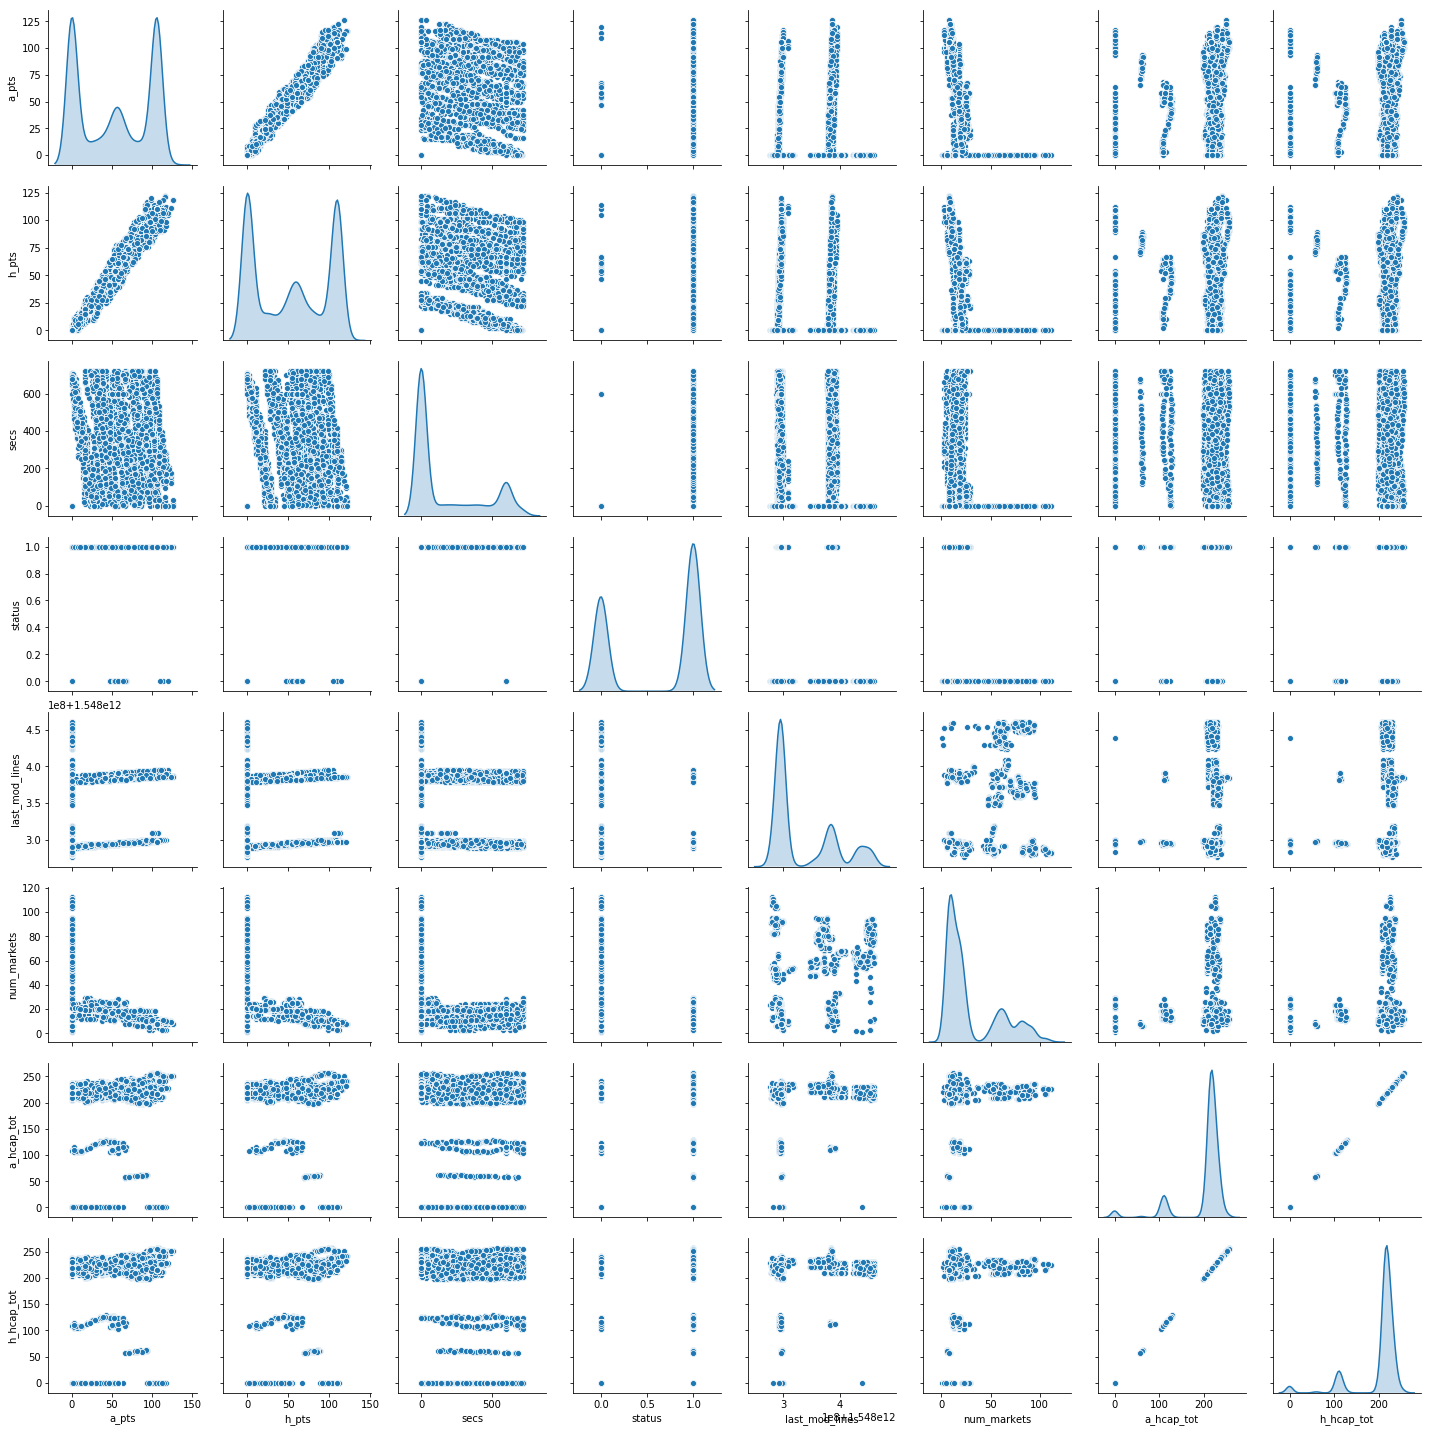

In [6]:
sns_plot = sns.pairplot(xtr[['a_pts', 'h_pts', 'secs', 'status', 'last_mod_lines', 'num_markets', 'a_odds_ml', 'h_odds_ml', 'a_hcap_tot', 'h_hcap_tot']], diag_kind="kde")

In [7]:
sns_plot.savefig("/home/sippycups/Programming/tensorflow/visuals/output_many_1_25_19.png")

In [14]:
xtr_stats = xtr.describe()
xte_stats = xte.describe()
xte_stats

,a_pts,h_pts,secs,status,last_mod_lines,num_markets,h_hcap_tot
count,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2651.000000,2651.000000
mean,53.208223,54.050924,168.429649,0.607695,1.548334e+12,30.171633,200.261788
std,44.767707,45.829010,244.052314,0.488356,5.579425e+07,27.788194,51.762689
min,0.000000,0.000000,-1.000000,0.000000,1.548277e+12,3.000000,0.000000
25%,0.000000,0.000000,-1.000000,0.000000,1.548296e+12,8.000000,213.000000
50%,56.000000,56.000000,0.000000,1.000000,1.548297e+12,18.000000,215.500000
75%,106.000000,110.000000,354.000000,1.000000,1.548383e+12,54.000000,223.000000
max,123.000000,122.000000,720.000000,1.000000,1.548461e+12,111.000000,255.500000


In [9]:
xtr_stats.pop('a_hcap_tot')
xtr_stats = xtr_stats.transpose()

In [10]:
ytr = xtr.pop('a_hcap_tot')
yte = xte.pop('a_hcap_tot')
xtr_stats['mean']

a_pts             5.385185e+01
h_pts             5.464108e+01
secs              1.730583e+02
status            6.097699e-01
last_mod_lines    1.548336e+12
num_markets       3.002150e+01
h_hcap_tot        2.023735e+02
Name: mean, dtype: float64

In [11]:
def norm(x):
  return (x - xtr_stats['mean']) / xtr_stats['std']

In [16]:
nxtr = norm(xtr)
# nxte = norm(xte)
nxtr

KeyError: 'mean'

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(xtr.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()
# model.summary()

In [ ]:
example_batch = nxtr[:10]
example_result = model.predict(example_batch)
example_result

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [ ]:
# print(str(len(ytr)))
# print(str(len(xtr[['away_score']])))

In [ ]:
EPOCHS = 300

history = model.fit(
  nxtr, ytr.values.ravel(),
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ml_home_amer]')

  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,2])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ml_home_amer^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)
plt.savefig("/home/sippycups/Programming/tensorflow/visuals/plt_loss.png")

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(nxtr, ytr.values.ravel(), epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

In [ ]:
test_predictions = model.predict(nxte).flatten()

plt.scatter(yte, test_predictions)
plt.xlabel('True Values [a_odds_ml]')
plt.ylabel('Predictions [a_odds_ml]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.savefig("/home/sippycups/Programming/tensorflow/visuals/predict.png")

In [ ]:
error = test_predictions - yte
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [a_odds_ml]")
_ = plt.ylabel("Count")
plt.savefig("/home/sippycups/Programming/tensorflow/visuals/predict_error.png")